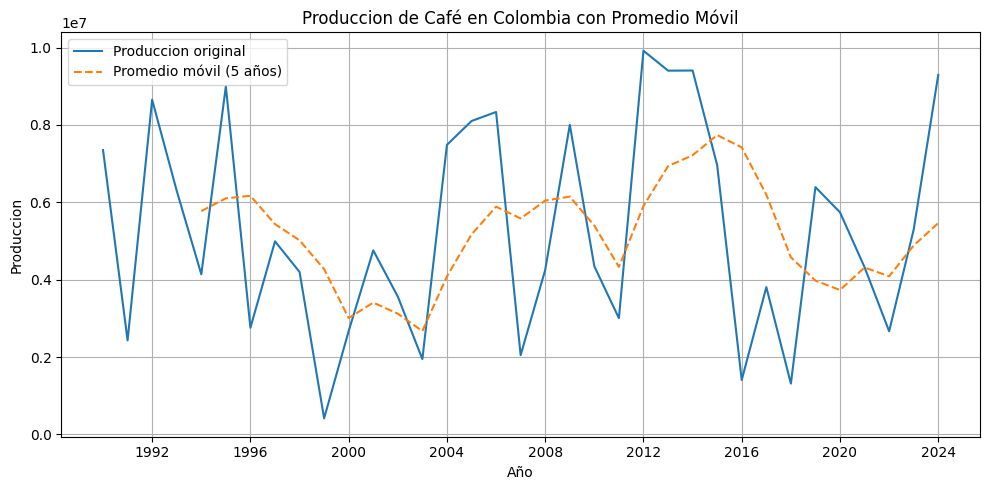

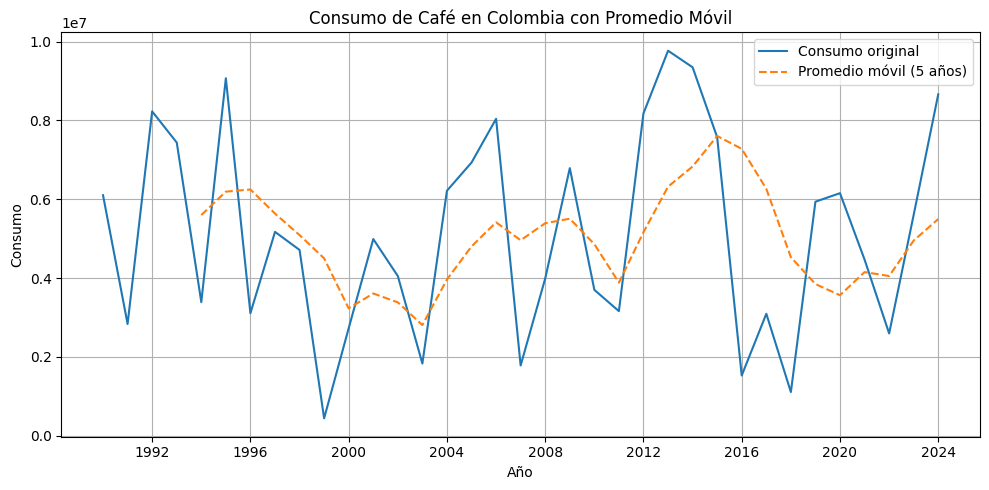

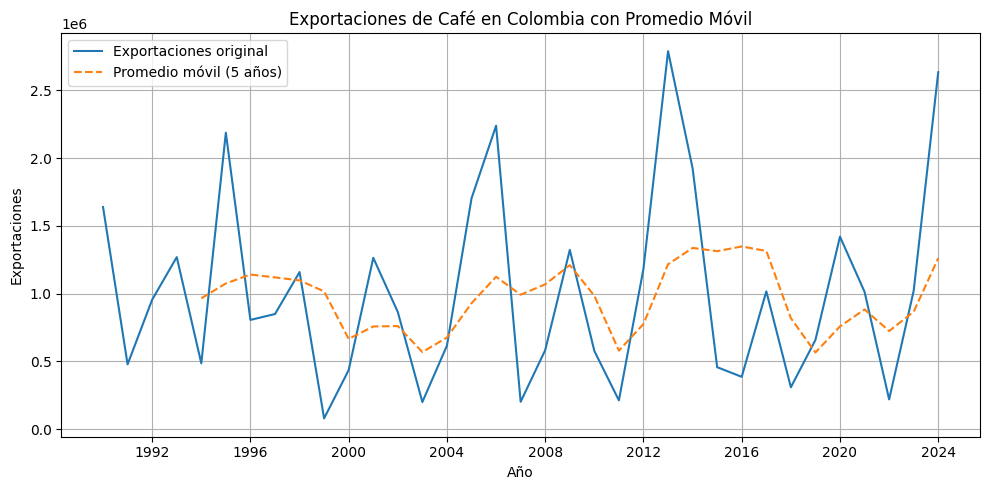

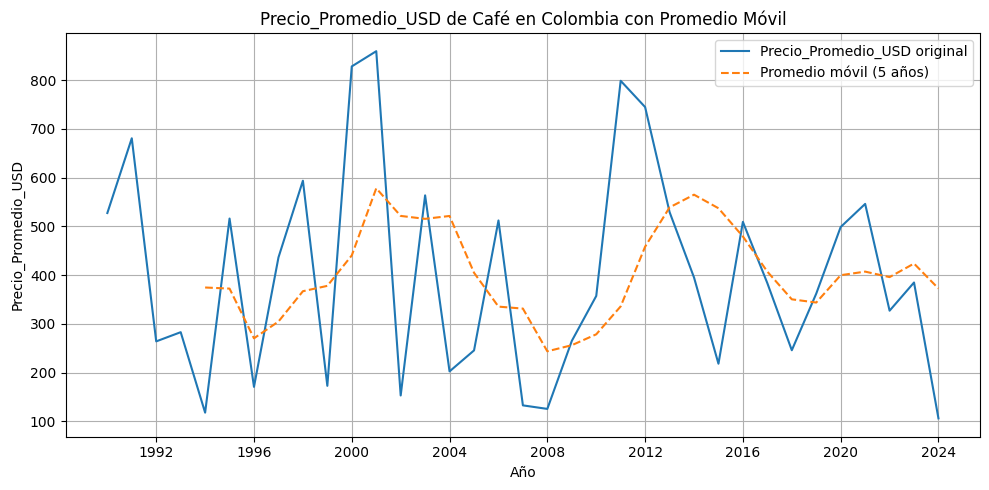

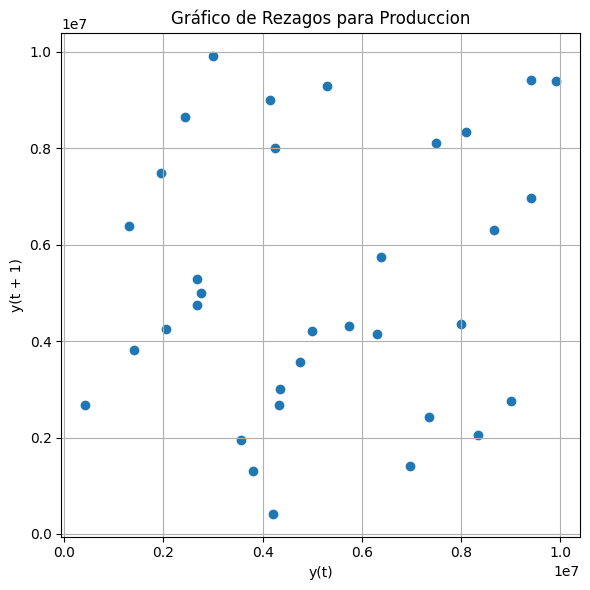

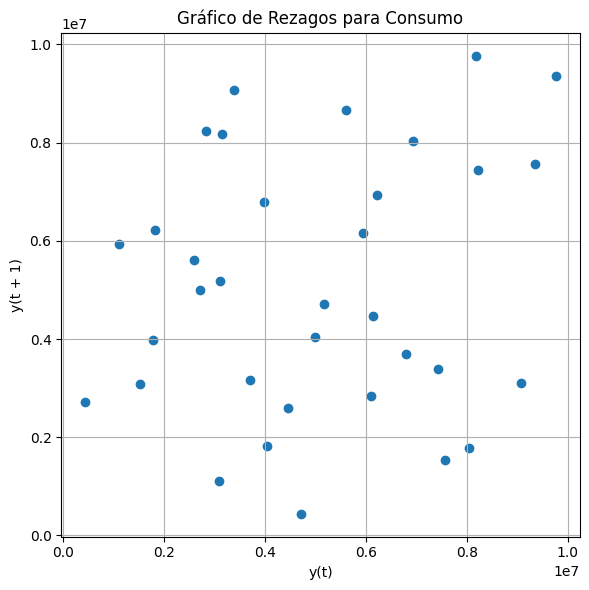

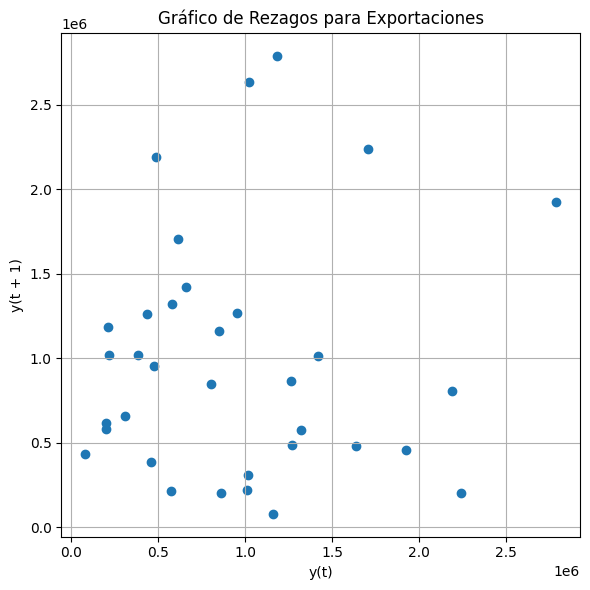

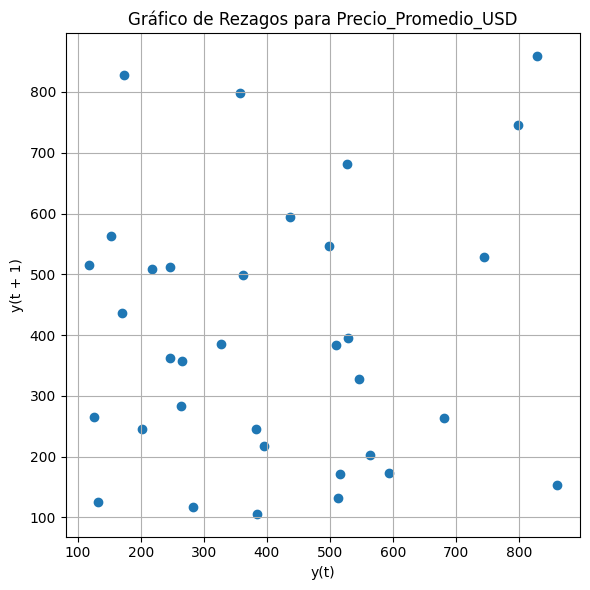

<Figure size 1000x400 with 0 Axes>

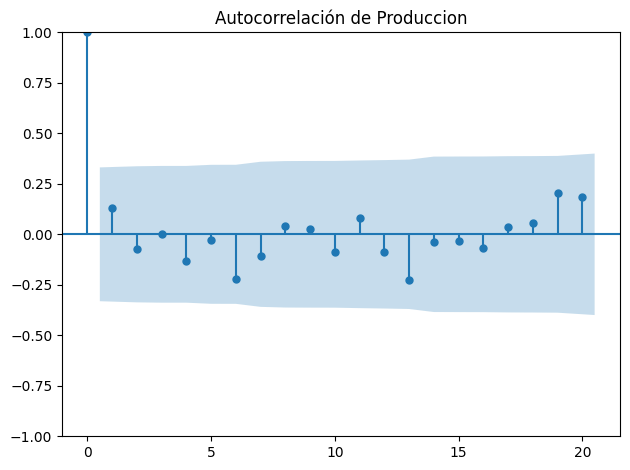

<Figure size 1000x400 with 0 Axes>

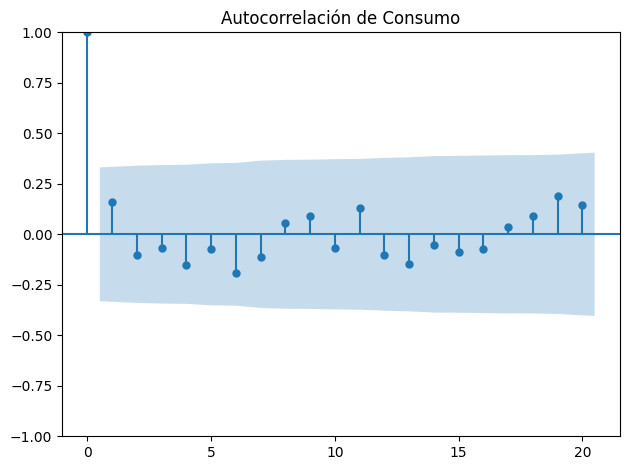

<Figure size 1000x400 with 0 Axes>

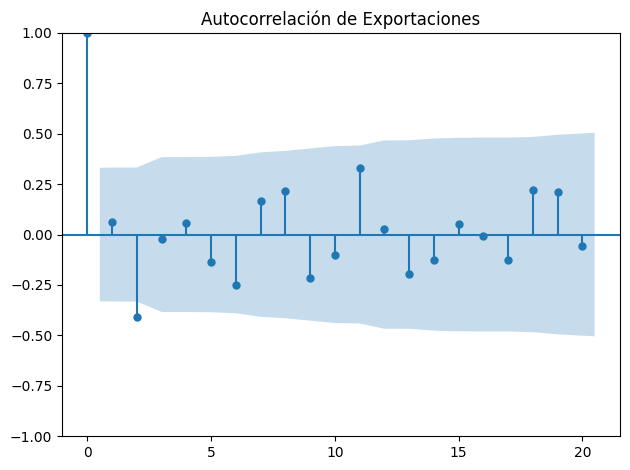

<Figure size 1000x400 with 0 Axes>

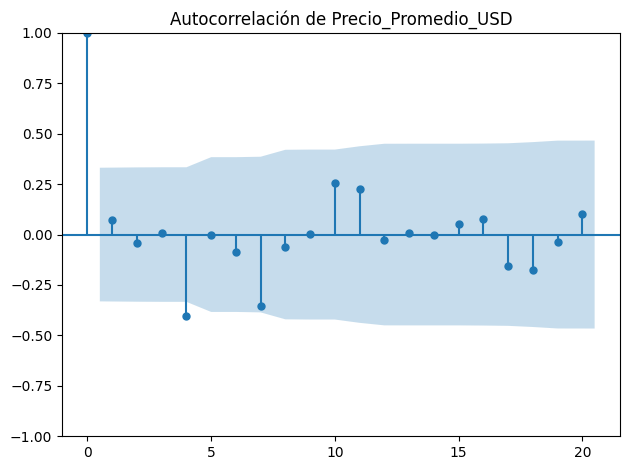

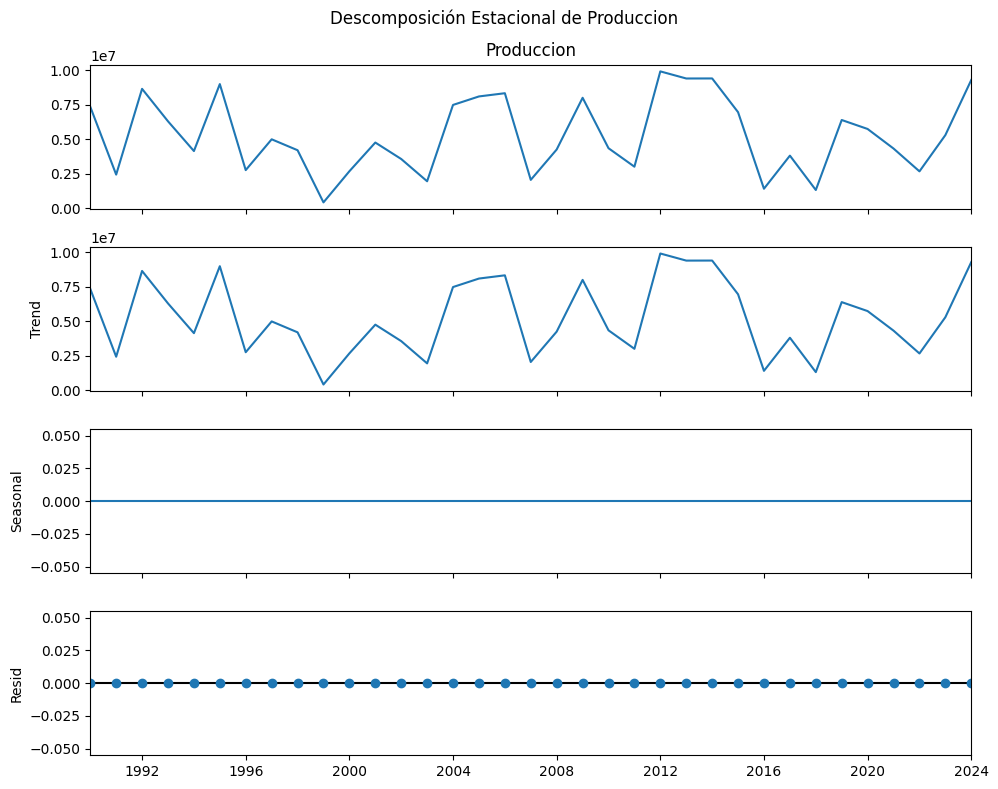

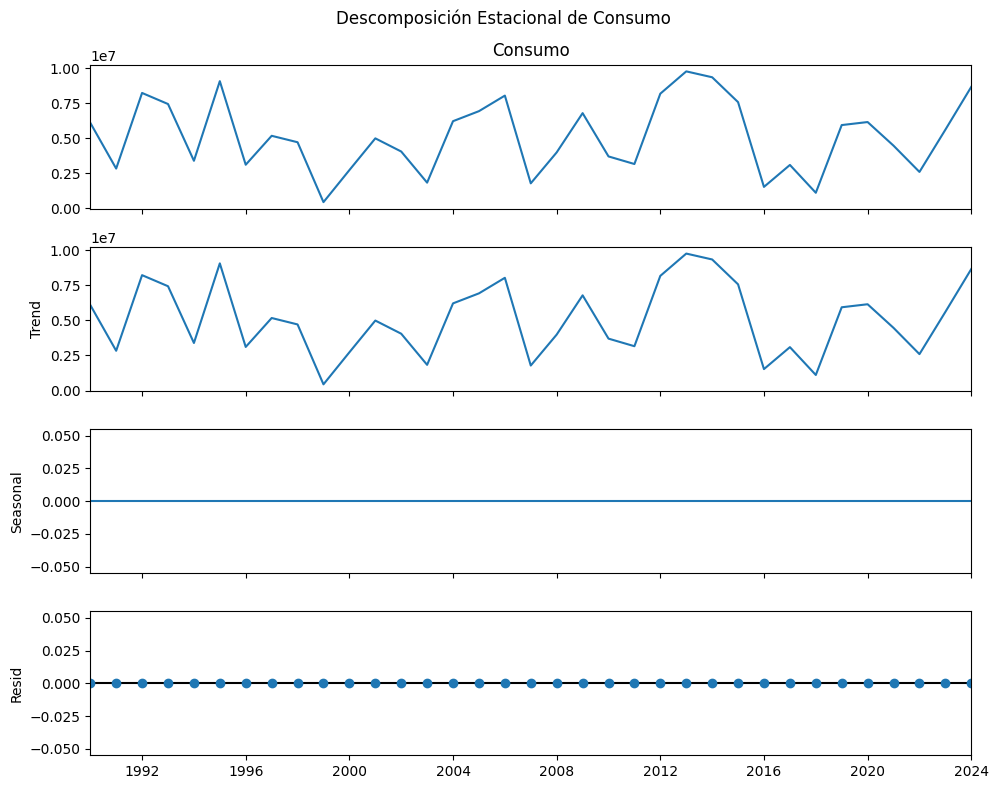

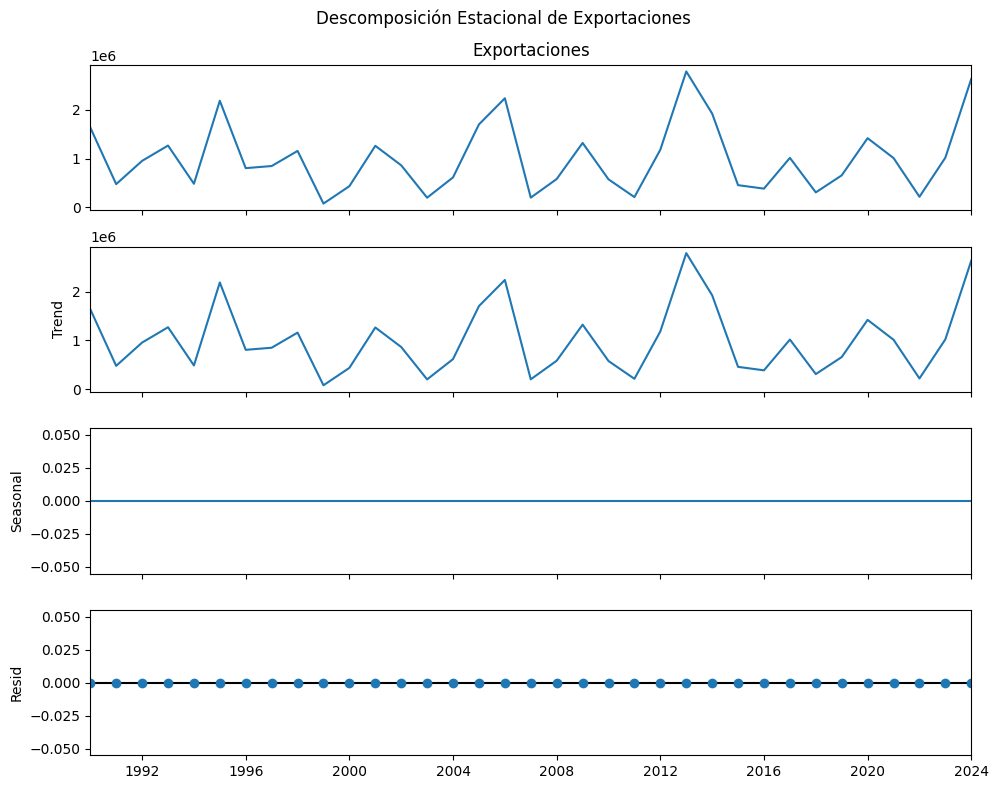

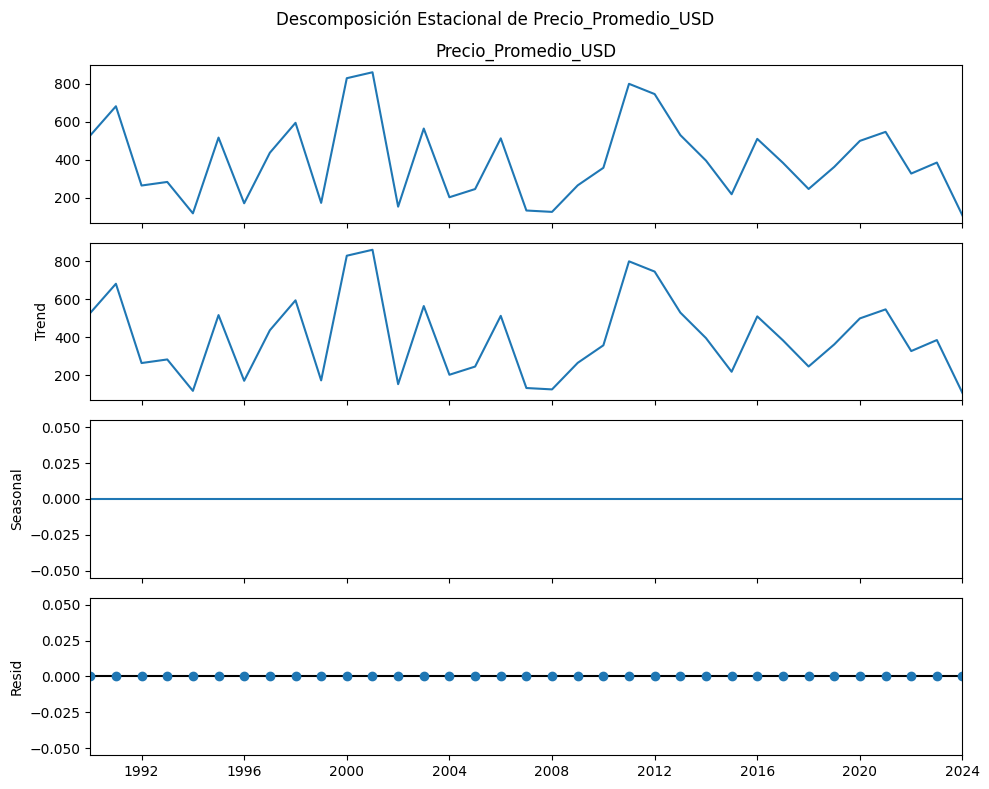

In [ ]:
# Instalar dependencias necesarias
!pip install pandas matplotlib seaborn statsmodels

# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot

# Cargar el archivo CSV (ajusta el path si es necesario)
df = pd.read_csv("FAOSTAT_Produccion_Agricola_Extendida.csv")

# Filtrar datos para Colombia y producto Café
df_colombia = df[(df["Pais"] == "Colombia") & (df["Producto"] == "Coffee")].copy()

# Convertir la columna Año a tipo datetime
df_colombia["Año"] = pd.to_datetime(df_colombia["Año"], format="%Y")

# Establecer el índice como Año
df_colombia.set_index("Año", inplace=True)

# Variables a analizar
variables = ["Produccion", "Consumo", "Exportaciones", "Precio_Promedio_USD"]

# Gráficos de series originales y promedio móvil
for var in variables:
    plt.figure(figsize=(10, 5))
    plt.plot(df_colombia[var], label=f"{var} original")
    plt.plot(df_colombia[var].rolling(window=5).mean(), label="Promedio móvil (5 años)", linestyle="--")
    plt.title(f"{var} de Café en Colombia con Promedio Móvil")
    plt.xlabel("Año")
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gráficos de rezagos
for var in variables:
    plt.figure(figsize=(6, 6))
    lag_plot(df_colombia[var])
    plt.title(f"Gráfico de Rezagos para {var}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gráficos de autocorrelación
for var in variables:
    plt.figure(figsize=(10, 4))
    plot_acf(df_colombia[var].dropna(), lags=20)
    plt.title(f"Autocorrelación de {var}")
    plt.tight_layout()
    plt.show()

# Descomposición estacional
for var in variables:
    try:
        decomposition = seasonal_decompose(df_colombia[var], model='additive', period=1)
        fig = decomposition.plot()
        fig.set_size_inches(10, 8)
        plt.suptitle(f"Descomposición Estacional de {var}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"No se pudo descomponer la serie {var}: {e}")

Comentarios:

En la producción de café en toneladas cada 10 años se encuentra un pico alto, igual sucede para el consumo, las exportaciones y el precio promedio. El análisis de promedio móvil suaviza la serie y se mantiene los picos cada 10 años para la producción, el consumo, las exportaciones, para el promedio precio promedio se suavizan a solo dos picos altos en 2001 y 2014, con respecto al gráfico de rezagos en la producción de café se observan dos clústeres a izquierda y derecha de una recta imaginaria con pendiente positiva que indica que la producción aumenta, igual sucede con el consumo, en las exportaciones se observa un gran clúster de datos abajo de la recta y = 1.5 y unos datos atípicos por encima de la recta citada, en el precio promedio un gran cluster abajo del punto (600,600) y datos dispersos por encima del punto y a la derecha del punto. Las cuatro variables muestran una correlación baja entre -0,25 y 0,25, y alrededor de y = 0, (sin autocorrelación). El análisis de estacionalidad para la producción de café y el consum muestra una tendencia por abajo de 10M, exportaciones por abajo de 3M y un precio promedio para cada quinquenio por abajo de 800 US $.

Identificar los períodos decenales de picos altos puede explicarse con situacones políticas, económicas, sociala o ambientales del mercado lo que permite plantear politicas a largo plazo.

Los dos picos altos en el promedio móvil indica una mauor volatilidad. Los clústeres que se encuentran indican relaciones lineales entre las variables, y la dispersión en el precio promedio muestra la incidencia de factores externos como los ya citados.

 Por otra parte, el café, es un cultivo que depende de las lluvias para cubrir sus necesidades hídricas. Cuando la planta de café es sometida a un exceso de agua, la asimilación de esta se hace poco eficiente afectado el así la productividad (Rodríguez, Y.L. et al, 2012). Las lluvias en Colombia son afectadas por un ciclo de la naturaleza conocido como fenómeno del niño y la niña, donde este último genera un aumento de las precipitaciones.  En los años 1998,1999,2000, 2007, 2008, 2010 y 2011 la niña se intensifico (Schreck C.J.B, 2024) como consecuencia hubo un aumento de lluvias, por eso se puede observar las caídas en el grafico de producción de café en Colombia , las cuales van de la mano con el consumo y la exportación, caso contrario, el precio se vio favorecido cuando se presentó este fenómeno.


Rodríguez, Y. L., & Pabón, J. D. (2012). La variabilidad climática interanual asociada al ciclo El Niño-La Niña-Oscilación del Sur y su efecto en el clima de Colombia. Revista de la Academia Colombiana de Ciencias Exactas, Físicas y Naturales, 36(140), 421-435. http://www.scielo.org.co/scielo.php?pid=S2011-21732012000100009&script=sci_arttext

Schreck, C. J. B. (s.f.). El Niño - Southern Oscillation (ENSO). GGWeather. Recuperado 22 de mayo de 2024, de https://ggweather.com/enso/oni.htm

